In [1]:
import numpy as np
import cv2

In [2]:
image = cv2.imread('image.jpg')

## So as we can see it's a color image as it has 3 channels

In [3]:
image.shape

(339, 509, 3)

## To see the image

In [4]:
#cv2.imshow('Image',image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

2024-08-23 12:48:23.206 Python[3330:30478] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


## To convert it to a grayscale image

In [3]:
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)

## Now as we can see it's a grayscale image

In [7]:
image.shape

(339, 509)

In [8]:
image

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [4]:
sobel_vertical = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])

In [10]:
sobel_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [11]:
rows, cols = image.shape

In [12]:
rows

339

In [13]:
cols

509

In [14]:
rows, cols

(339, 509)

## As we know the resulted shape is n-k+1

In [15]:
k = sobel_vertical.shape[0]

In [16]:
k

3

## As we know np.zeros takes a tuple and create a matrix by tuple

In [18]:
np.zeros((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## So to create the output matrix we'll use the same n-k+1 formula

In [19]:
output_matrix = np.zeros((rows - k + 1, cols - k + 1))

In [20]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## So now we'll iterate through all the pixel values to create the output image

In [24]:
for i in range(1,rows+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [25]:
## Bhai ka
# for i in range(1, rows-1):
#     for j in range(1, cols-1):
#         region = image[i-1:i+2, j-1:j+2]
#         print(region)
#         break
#     break

## To select the first 3X3 matrix, fancy indexing is used

In [26]:
for i in range(1, rows+1):
    for j in range(1, cols+1):
        region = image[i-1:i+2, j-1:j+2]
        print(region)
        break
    break

[[0 0 0]
 [0 0 0]
 [0 0 0]]


## Problem going with rows+1

### This code is looping from 1 to rows+1 and 1 to cols+1.
### However, when i or j reach the edges of the image (rows+1 or cols+1), the slice image[i-1:i+2, j-1:j+2] will try to access parts of the image outside its boundaries.
### For example, when i = rows, image[i-1:i+2, j-1:j+2] tries to access image[rows-1:rows+2, j-1:j+2], which extends beyond the image boundaries, resulting in a region with a shape like (3, 2) instead of (3, 3).

In [29]:
for i in range(1, rows+1):
    for j in range(1, cols+1):
        region = image[i-1:i+2, j-1:j+2]
        output_matrix[i-1, j-1] = np.sum(region * sobel_vertical)

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

In [30]:
for i in range(1, rows-1):
    for j in range(1, cols-1):
        region = image[i-1:i+2, j-1:j+2]
        output_matrix[i-1, j-1] = np.sum(region * sobel_vertical)

In [31]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## To plot the images

In [7]:
import matplotlib.pyplot as plt

## Now when we plot we can how the edge is detected

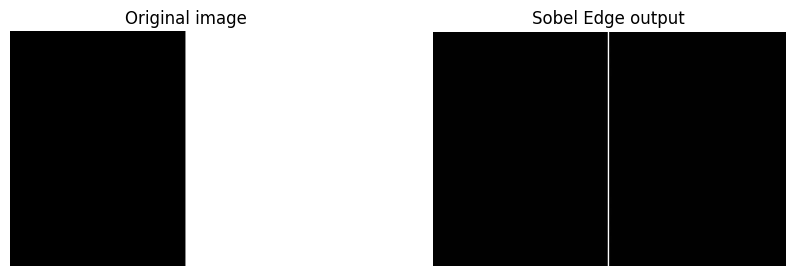

In [33]:
plt.figure = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel Edge output')
plt.imshow(output_matrix,cmap='gray')
plt.axis('off')
plt.show()

## The same thing can be done by the help of sobel packages

In [5]:
sobel_output = cv2.filter2D(image,-1,sobel_vertical)

In [6]:
sobel_output.shape

(339, 509)

## Now if we plot we'll see similar output (May have to run this cell independently)

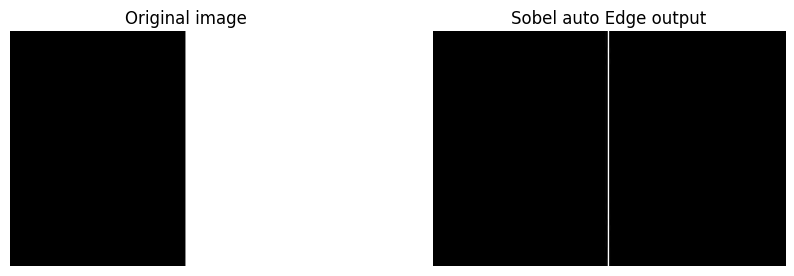

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel auto Edge output')
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')
plt.show()

## let's it al together

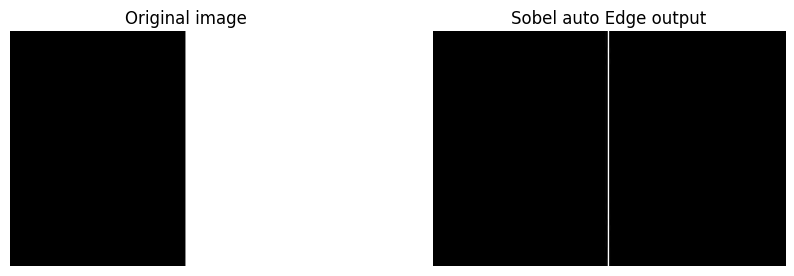

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
sobel_vertical = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])
sobel_output = cv2.filter2D(image,-1,sobel_vertical)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel auto Edge output')
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')
plt.show()

## Let's do the same thing with the horizontal sobel
## As we can we don't see any edges in the output because there's no horizontal edges in the original image

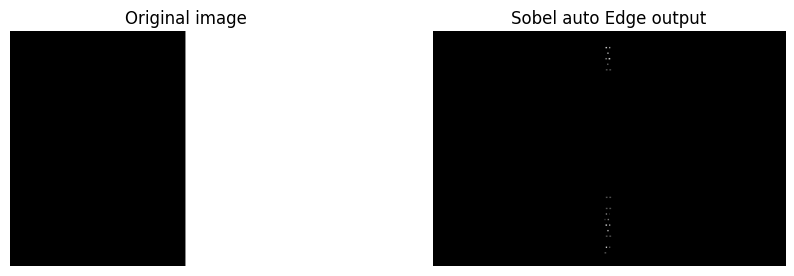

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
sobel_vertical = np.array([[+1,+2,+1],
                           [0,0,0],
                           [-1,-2,-1]])
sobel_output = cv2.filter2D(image,-1,sobel_vertical)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel auto Edge output')
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')
plt.show()


<img src="screenshot 2024-08-23 at 2.22.14 PM-1.png" alt="drawing" width="600"/>

## Let's try the blur kernel, it's not that clear because the not many subject in the image

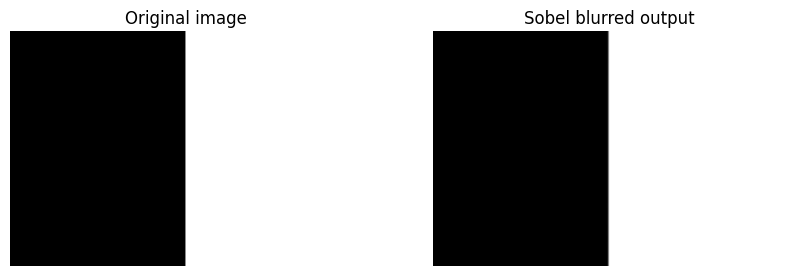

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
sobel_vertical = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])
sobel_output = cv2.filter2D(image,-1,sobel_vertical)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel blurred output')
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')
plt.show()

## Let's try with some other images

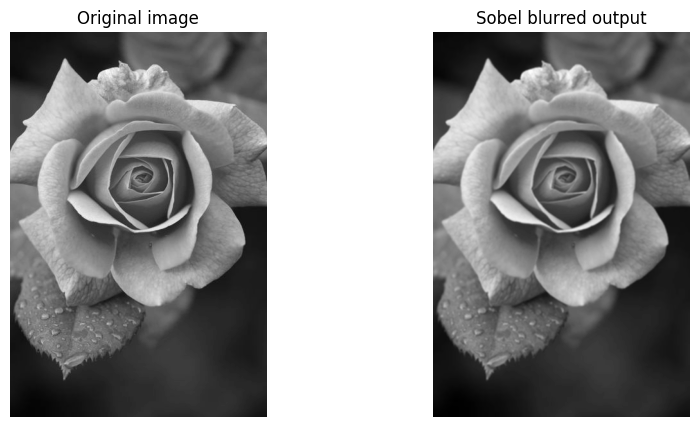

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image_rose = cv2.imread('rose.jpg',cv2.IMREAD_GRAYSCALE)
sobel_vertical = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])
sobel_output = cv2.filter2D(image_rose,-1,sobel_vertical)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(image_rose,cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel blurred output')
plt.imshow(sobel_output,cmap='gray')
plt.axis('off')
plt.show()

### different types of kernels here: https://en.wikipedia.org/wiki/Kernel_(image_processing)